# Train Continuous Control Agent (many arm)
---

In this notebook, we train the Unity ML-Agent to solve the double-jointed arm environment.

### 1. Import the Necessary Packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent_con1 import Agent

# be sure to change to your environment
one_arm_file = '/home/robert/RL_ubuntu/udacity_rlnd_cont_cntl/Reacher_Linux/Reacher.x86_64'
many_arm_file = '/home/robert/RL_ubuntu/udacity_rlnd_cont_cntl/Reacher_Linux (2)/Reacher_Linux/Reacher.x86_64'

seed = 42

### 2. Instantiate the Environment and Agent

In [2]:
from unityagents import UnityEnvironment
# one arm
# env = UnityEnvironment(file_name=one_arm_file, seed=seed)

# many arms
env = UnityEnvironment(file_name=many_arm_file)
# no_graphics=True

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]

# Set seed
agent = Agent(state_size=state_size, action_size=action_size, random_seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 10	Average Score: 0.69	Score: 0.51
Episode 20	Average Score: 1.36	Score: 2.64
Episode 30	Average Score: 3.13	Score: 9.059
Episode 40	Average Score: 5.47	Score: 13.13
Episode 50	Average Score: 7.60	Score: 17.64
Episode 60	Average Score: 9.50	Score: 21.23
Episode 70	Average Score: 11.43	Score: 23.66
Episode 80	Average Score: 13.12	Score: 24.51
Episode 90	Average Score: 14.71	Score: 27.32
Episode 100	Average Score: 16.13	Score: 28.83
Episode 110	Average Score: 19.00	Score: 31.23
Episode 120	Average Score: 21.73	Score: 29.39
Episode 130	Average Score: 24.13	Score: 30.96
Episode 140	Average Score: 26.15	Score: 33.11
Episode 150	Average Score: 27.75	Score: 33.69
Episode 160	Average Score: 29.11	Score: 33.71
Episode 169	Average Score: 30.02	Score: 33.15
Environment solved in 69 episodes!	Average Score: 30.02


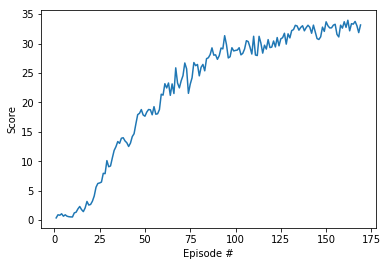

In [3]:
def ddpg(n_episodes=1000, max_t=10000, from_checkpoint=False):
    if from_checkpoint:
        agent.actor_local.load_state_dict(torch.load('checkpoint_actor2.pth'))
        agent.critic_local.load_state_dict(torch.load('checkpoint_critic2.pth'))    
    scores_deque = deque(maxlen=100)
    scores_g = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores+= env_info.rewards
            if np.any(dones):
                break
        score = np.mean(scores)
        scores_deque.append(score)
        scores_g.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        if np.mean(scores_deque) > 30:
            torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'final_critic.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
    return scores_g

scores = ddpg()
#scores = ddpg(from_checkpoint=True)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#env.close()

In [10]:
print(agent.actor_local)
print(agent.critic_local)

Actor(
  (bn0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (bn2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [11]:
agent.actor_local.load_state_dict(torch.load('final_actor.pth'))
agent.critic_local.load_state_dict(torch.load('final_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions =  agent.act(states)                       # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 33.22899925727397


env.close()